### 선형회귀기반 분류 알고리즘 학습 - LogisticRegression + 교차검증

- 이진분류 및 다중분류 가능
- 분류지만 선형회귀식기반의 알고리즘이라서 Regresion

In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

#### [1] 데이터 준비 및 확인

In [123]:
filename='../Data/iris.csv'

In [124]:
irisDF= pd.read_csv(filename)

In [125]:
irisDF.head(2)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa


- 2개 품종만 추출 

In [126]:
irisDF.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [127]:
dataDF=irisDF[irisDF.variety != 'Virginica'].copy()
dataDF.shape

(100, 5)

2개 품종 식병 가능한 피쳐 선택

In [128]:
SETO = dataDF['variety']=='Setosa'
VESI = dataDF['variety']=='Versicolor'

In [129]:
dataDF[SETO]['petal.length']
dataDF[VESI]['petal.length']

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal.length, dtype: float64

- 꽃잎의 길이와 너비(petal.length, petal.width) 특성만 추출

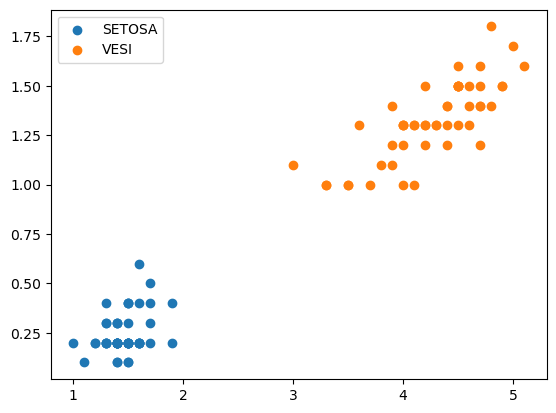

In [130]:
plt.scatter(dataDF[SETO]['petal.length'],dataDF[SETO]['petal.width'], label = 'SETOSA')
plt.scatter(dataDF[VESI]['petal.length'],dataDF[VESI]['petal.width'], label = 'VESI')

plt.legend()
plt.show()

In [131]:
dataDF.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [132]:
dataDF=dataDF[dataDF.columns[2:]].copy()

In [133]:
dataDF.shape

(100, 3)

In [134]:
dataDF.head(3)

,petal.length,petal.width,variety
0,1.4,0.2,Setosa
1,1.4,0.2,Setosa
2,1.3,0.2,Setosa


In [135]:
#품종 컬럼 문자열 ==> 수치형 변환
pd.set_option('future.no_silent_downcasting', True)
labelToNum={'Setosa' : 0, 'Versicolor':1}
dataDF['variety_no']=dataDF.variety.replace(labelToNum )

In [136]:
dataDF.head(3)

,petal.length,petal.width,variety,variety_no
0,1.4,0.2,Setosa,0
1,1.4,0.2,Setosa,0
2,1.3,0.2,Setosa,0


In [137]:
dataDF.corr(numeric_only=True)

,petal.length,petal.width
petal.length,1.000000,0.979322
petal.width,0.979322,1.000000


#### [2] 데이터 가공

- 피쳐/특성/독립과 타겟/클래스/종속변수 분리

In [138]:
featureDF = dataDF[dataDF.columns[:2]]
classDF = dataDF.variety_no

In [139]:
classDF = classDF.astype('int')
classDF

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: variety_no, Length: 100, dtype: int64

In [140]:
print(f'featureDF : {featureDF.shape}  classDF : {classDF.shape}')

featureDF : (100, 2)  classDF : (100,)


- 훈련용/테스트용 분리

In [141]:
# - 분류시에는 훈련용/테스트용에 동일한 비율로 타겟이 배분
#  stratify 매개변수 : 타겟 데이터셋의 클래스/라벨 비율에 맞게 학습용/테스트용 분리
train_X, test_X, train_y, test_y = train_test_split(featureDF, classDF,
                                                    random_state=7,
                                                    test_size=0.2,
                                                    stratify=classDF)

In [142]:
print(f'[Train_X] {train_X.shape}, [Train_y] {train_y.shape}')
print(f'[Test_X] {test_X.shape}, [test_y] {test_y.shape}')


[Train_X] (80, 2), [Train_y] (80,)
[Test_X] (20, 2), [test_y] (20,)


In [143]:
# 데이터셋 별로 클래스 갯수 확인
test_y.value_counts(), train_y.value_counts()

(variety_no
 1    10
 0    10
 Name: count, dtype: int64,
 variety_no
 1    40
 0    40
 Name: count, dtype: int64)

- 특성/피쳐 2개에 대한 스케일링 진행

- 	특성/피쳐 2개에 대한 스케일링 진행 ==> 피쳐의 값의 범위 일치

In [144]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [145]:
# StandardScaler : 평균 0, 표준편차 1 즉, 정규분포 따르도록 스케일링
# 훈련용 DS기반의 스케일러는 테스트용 DS, 사용자 데이터에 대해 스케일링 진행함
scaler = StandardScaler()

scaler.fit(train_X)

StandardScaler()

In [146]:
# fit () 후에 설정되는 파라미터들 ==> 모델 파라미터
print(scaler.var_, scaler.mean_)

[2.12549375 0.32415   ] [2.8725 0.79  ]


In [147]:
# 훈련데이터와 테스트 데이터 스케일링 진행
# ==> 훈련용 생성한 스케일러로 훈련용, 테스트용 변환 진행 
# ==> 향후 임의의 새로운 데이터 예측(predict)시에도 해당 스케일러 적용
train_scaled_X = scaler.transform(train_X)
test_scaled_X = scaler.transform(test_X)

#### [3] 학습 
- 메인학습 : 지도학습 - 분류
- 세부학습 : 선형모델 로지스틱회귀

In [148]:
# 학습모델 객체
logR=LogisticRegression()

In [149]:
# 학습 진행 ==> 훈련용 데이터 진행 fit(2D, 1D)
logR.fit(train_scaled_X, train_y)

LogisticRegression()

In [150]:
# 학습 진행 후 설정되는 매개변수/파라미터 ===> 모델 파라미터 
# 파라메타명_
logR.classes_

array([0, 1])

In [151]:
# 피쳐 갯수 만큼 존재함. 피쳐*coef_
logR.coef_

array([[2.0321802218, 1.8833977985]])

In [152]:
# 절편/바이어스
logR.intercept_

array([0.250126814])

#### [4] 성능평가
- 이유 : 모델이 제대로 잘 만들어 졌는지 확인
- 과대적합/과소적합 체크
    * 과대적합/과적합/오버피팅(Overfitting) : 훈련 점수 > 테스트 점수
    * 과소적합/언더피팅(Underfitting) : 훈련과 테스트 점수 모두 낮음
    * 최적적합 : 훈련 점수와 테스트 점수 비슷 높은 점수 

- 점수 : 정확도(accuary_score)

In [153]:
train_score=logR.score(train_scaled_X, train_y)
test_score= logR.score(test_scaled_X, test_y)

In [154]:
print(f'train_score : {train_score}, test_score  : {test_score}')

train_score : 1.0, test_score  : 1.0


- 분류용 성능지표 ==>  sklearn.metrics 모듈

<pre>
* 정밀도 (precision) : 모델(예측값) 기준에서 양성/Positive를 제대로 예측한 비율
* 재현율 (Recall) : 정답기준에서 양성 / Positive 를 제대로 예측한 비율
* F1-score : 정밀도와 재현율의 조합합 계산법 <== 일반적인 경우 대부분 분류 성능지표로 사용
* 정확도(Accuracy) : 정답을 맞춘 비율 <= 불균형 데이터셋에 신뢰성 떨어짐
* 오차행렬 (Confusion_matrix) : 2진 분류에서 정답과 예측에 대한 평가표
</pre>

In [155]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [156]:
# 테스트 데이터기반으로 예측값 추출
y_pred=logR.predict(test_scaled_X)

y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0])

- [정밀도 점수] 

In [157]:
precision_score(test_y, y_pred)

1.0

In [158]:
recall_score(test_y, y_pred)

1.0

In [159]:
f1_score(test_y, y_pred)

1.0

In [160]:
confusion_matrix(test_y, y_pred)

array([[10,  0],
       [ 0, 10]])

In [161]:
print( classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



- 오차확인 : 손실/비용함수 => 알고리즘 마다 다름 log_loss()
	* 알고리즘 마다 손실/비용함수가 다름
	

In [162]:
from sklearn.metrics import log_loss

In [163]:
np.set_printoptions(precision=10, suppress=True)

In [164]:
# predict(): 확률을 보고 결정된 클래스/ 타겟 반환
y_pred = logR.predict(test_scaled_X)

#print(y_pred)

# predict_proba  : 확률 값을 반환 
y_pred_proba = logR.predict_log_proba(test_scaled_X)
#print(y_pred_proba)

# 손실 : 정답 - 예측값
# 	정답 1일때의 손실 정답 0일때의 손실
probaValue = [[],[]]
print('예측','	0확률	','	1확률', sep=' ')
for pred, proba in zip(y_pred, y_pred_proba):
	print(pred, proba, pred - proba[1])
	probaValue[1].append(proba[1].item()) if pred else probaValue[0].append(1-proba[0].item()) 

probaValue



예측 	0확률	 	1확률
1 [-3.9465267745 -0.0195107977] 1.0195107977306057
0 [-0.0916545535 -2.4352059009] 2.435205900904974
1 [-4.8234510407 -0.0080714833] 1.0080714832658029
1 [-1.6634273648 -0.2100896504] 1.210089650359313
0 [-0.0231507566 -3.7772808643] 3.77728086430842
1 [-5.2037157801 -0.0055112633] 1.0055112632667982
0 [-0.0175674568 -4.0504780049] 4.050478004893677
0 [-0.0265678557 -3.6413077433] 3.6413077432534777
0 [-0.03679508   -3.3207322676] 3.320732267632705
1 [-1.7348157002 -0.1941100251] 1.1941100251075702
1 [-4.8750657022 -0.0076638853] 1.0076638852816502
1 [-1.9697226033 -0.1502364878] 1.1502364878045575
0 [-0.0265678557 -3.6413077433] 3.6413077432534777
0 [-0.0304816863 -3.5058313537] 3.5058313536683685
1 [-4.1693571411 -0.0155829834] 1.0155829834086927
1 [-4.6852625118 -0.0092731745] 1.0092731745163934
0 [-0.0231507566 -3.7772808643] 3.77728086430842
0 [-0.0872050551 -2.4827786621] 2.4827786621137635
1 [-3.6739393738 -0.0257038374] 1.0257038373868672
0 [-0.0231507566 -3.77728

[[1.0916545534501898,
  1.0231507565767215,
  1.0175674567742303,
  1.026567855715654,
  1.0367950799933114,
  1.026567855715654,
  1.030481686324419,
  1.0231507565767215,
  1.0872050551482975,
  1.0231507565767215],
 [-0.019510797730605645,
  -0.008071483265802875,
  -0.21008965035931293,
  -0.005511263266798139,
  -0.19411002510757017,
  -0.007663885281650296,
  -0.1502364878045574,
  -0.01558298340869272,
  -0.00927317451639339,
  -0.025703837386867146]]

In [165]:
# numpy에서의 DataFrame의 replace()와 동일 기능 변경 
# test_y_ = np.where(test_y=='Versicolor', 0, 1)
# y_pred_ = np.where(y_pred=='Versicolor', 0, 1)

# y=1 일때 오차, y=0일때 오차 계산 ==> 손실/비용계산 
loss = log_loss(test_y, y_pred)
# print(f'loss : {loss :.6f}')

#print(test_y,y_pred)
print(f'loss : {loss :.6f}')




loss : 0.000000


### 교차검증 ---------------------------------------------------------

- 데이터부족에 따른 과대적합/과적합/오버피팅을 해결하기 위한 방안
- 기본 데이터 분리 갯수 => 5 (지금껏 해당 기능을 사용해 보니 가장 성능이 좋았음)
- 데이터 구성
    * 입력 : 훈련데이터 , 타겟데이터
    * 분리 : 훈련데이터 ==> n등분(기:5)
        - 학습 완료 후 현재 모델에 대한 검사 진행 ==> 검증데이터필요
        - 1/n : 검증데이터로 사용
        - n-1/n : 훈련데이터로 사용
        - [중요] 검증데이터는 매번 변경
            * 검 훈 훈 훈 훈
            * 훈 검 훈 훈 훈
            * 훈 훈 검 훈 훈
            * 훈 훈 훈 검 훈
            * 훈 훈 훈 훈 검

In [166]:
# 모듈 로딩 --------------------------------------------------
from sklearn.model_selection import cross_validate

In [167]:
# 모델객체, 훈련데이터, 타겟데이터
result= cross_validate(logR, train_scaled_X, train_y)

In [168]:
# 결과 result => dict 형태
for key, value in result.items(): print(key, value)

fit_time [0.0050001144 0.0049283504 0.0070006847 0.0073564053 0.0049993992]
score_time [0.0010001659 0.0020003319 0.001999855  0.001999855  0.0020003319]
test_score [1. 1. 1. 1. 1.]


In [169]:
# 모델객체, 훈련데이터, 타겟데이터 , 훈련결과, 최고의 모델 
result2= cross_validate(logR, train_scaled_X, train_y, 
                        return_estimator=True, 
                        return_train_score=True)

In [170]:
for key, value in result2.items(): print(key, value)

fit_time [0.0071246624 0.0020079613 0.0044314861 0.005001545  0.0039987564]
score_time [0.0020091534 0.0034511089 0.0010156631 0.0019989014 0.0010001659]
estimator [LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression()]
test_score [1. 1. 1. 1. 1.]
train_score [1. 1. 1. 1. 1.]


In [171]:
# test_score와 train_score 값 비교해서 과대적합/과적합/오버피팅이 되지 않은
# 가장 좋음 모델 선택 후 추출
best_estimator=result2['estimator'][2]

In [172]:
featureDF[:1]

,petal.length,petal.width
0,1.4,0.2


In [173]:
new_data = pd.DataFrame([[1.4, 0.8]], columns=featureDF.columns)
new_data_ = scaler.transform(new_data)

In [174]:
best_estimator.predict(new_data_)

array([0])

In [175]:
best_estimator.predict_proba(new_data_)

array([[0.8490584214, 0.1509415786]])